In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

dt_qzvpp=pd.read_pickle('data_def2_qzvpp')
dt_tzvp=pd.read_pickle('data_def2_tzvp')
dt_sto3g=pd.read_pickle("data_sto3G")
dt_sto6g=pd.read_pickle("data_sto6G")
dt_321g=pd.read_pickle("data_321G")
dt_631g=pd.read_pickle("data_631G")
dt_aug=pd.read_pickle("data_aug")
dt_ccpvtz=pd.read_pickle("data_ccpvtz")

In [5]:
basisSets=['sto3G', 'sto6G', '321G','631G*','def2-TZVP','def2-QZVPP','cc-pVTZ','aug-cc-pVQZ']
molecule_list=['HAl','HeMg','LiNa','BeNe','BF','CO','NN']
molecules={'HAl':1,'HeMg':2,'LiNa':3,'BeNe':4,'BF':5,'CO':6,'NN':7}
datasets=[dt_sto3g,dt_sto6g,dt_321g,dt_631g,dt_ccpvtz,dt_aug,dt_tzvp,dt_qzvpp]

In [3]:
for mol in molecule_list:
    print(molecules[mol])

1
2
3
4
5
6
7


In [4]:
dt_tzvp[:10]

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch
0,0,1.3,def2-TZVP,-198.264071,-200.900798,HAl,HeMg,2.636727,3.75217,-199.911285,1.647214
1,1,1.3,def2-TZVP,-199.783769,-200.900798,HAl,HeMg,1.117029,3.75217,-199.911285,0.127516
2,2,1.3,def2-TZVP,-199.933676,-200.900798,HAl,HeMg,0.967122,3.75217,-199.911285,-0.022391
3,3,1.3,def2-TZVP,-199.924468,-200.900798,HAl,HeMg,0.976330,3.75217,-199.911285,-0.013183
4,4,1.3,def2-TZVP,-199.911379,-200.900798,HAl,HeMg,0.989419,3.75217,-199.911285,-0.000095
5,0,1.4,def2-TZVP,-198.574939,-201.247330,HAl,HeMg,2.672391,3.80592,-200.258950,1.684010
6,1,1.4,def2-TZVP,-200.135536,-201.247330,HAl,HeMg,1.111794,3.80592,-200.258950,0.123413
7,2,1.4,def2-TZVP,-200.285113,-201.247330,HAl,HeMg,0.962218,3.80592,-200.258950,-0.026163
8,3,1.4,def2-TZVP,-200.270706,-201.247330,HAl,HeMg,0.976625,3.80592,-200.258950,-0.011756
9,4,1.4,def2-TZVP,-200.258703,-201.247330,HAl,HeMg,0.988627,3.80592,-200.258950,0.000246


In [25]:
df=dt_tzvp.query("alchemy==0 ").copy()
df['deltaZ']=[molecules[x] for x in df.target]
df['deltaZ']-=[molecules[x] for x in df.ref]
df['deltaZ']=np.abs(df['deltaZ'])
df[::100]
(df.query("deltaZ==4").e_ccsd-df.query("deltaZ==4").e_at_ref_bs).mean()

-8.074244956965076

In [29]:
for dt in datasets:
    df=dt.query("alchemy==0 ").copy()
    df['deltaZ']=[molecules[x] for x in df.target]
    df['deltaZ']-=[molecules[x] for x in df.ref]
    df['deltaZ']=np.abs(df['deltaZ'])
    df[::100]
    print((df.query("deltaZ==2").e_ccsd-df.query("deltaZ==2").e_at_ref_bs).mean(),df.basis_set[:2])

-8.182009810586093 0    sto3G
5    sto3G
Name: basis_set, dtype: object
-8.144018344689483 0    sto6G
5    sto6G
Name: basis_set, dtype: object
-6.96925357091947 0    321G
5    321G
Name: basis_set, dtype: object
-6.629205529433562 0    631G*
5    631G*
Name: basis_set, dtype: object
-3.3426289911569556 0    cc-pVTZ
5    cc-pVTZ
Name: basis_set, dtype: object
-1.7581575803318352 0    aug-cc-pVQZ
5    aug-cc-pVQZ
Name: basis_set, dtype: object
-2.02842382516014 0    def2-TZVP
5    def2-TZVP
Name: basis_set, dtype: object
-0.3372842677378665 0    def2-QZVPP
5    def2-QZVPP
Name: basis_set, dtype: object


In [55]:
def plot(dt,ax):
    for i in range(1,5):
        df=dt.query("alchemy==0 ").copy()
        df['deltaZ']=[molecules[x] for x in df.target]
        df['deltaZ']-=[molecules[x] for x in df.ref]
        df['deltaZ']=np.abs(df['deltaZ'])
        df[::100]
        ax.bar(i,(df.query("deltaZ==@i").e_at_ref_bs-df.query("deltaZ==@i").e_ccsd).mean())
    ax.set_title(df.basis_set.to_list()[3])

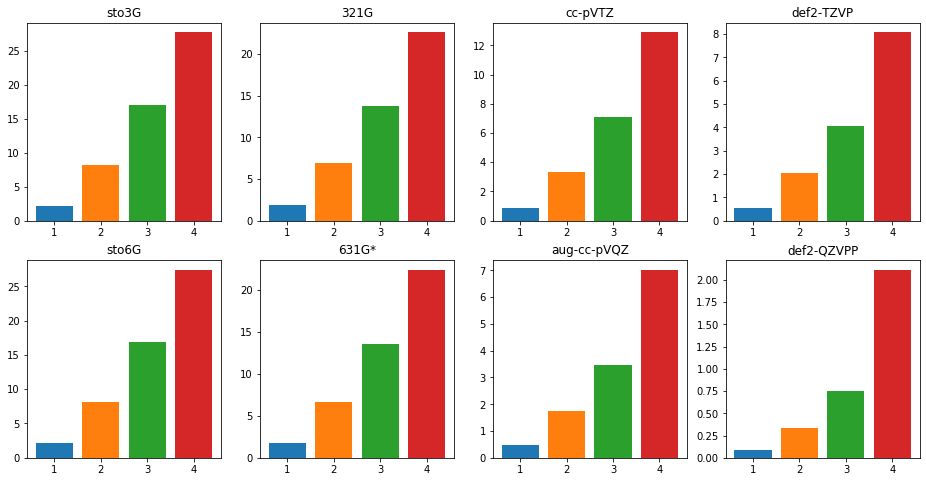

In [60]:
fig,axs=plt.subplots(2,4,figsize=(16,8))

plot(dt_sto3g,axs[0][0])
plot(dt_sto6g,axs[1][0])

plot(dt_321g,axs[0][1])
plot(dt_631g,axs[1][1])

plot(dt_ccpvtz,axs[0][2])
plot(dt_aug,axs[1][2])

plot(dt_tzvp,axs[0][3])
plot(dt_qzvpp,axs[1][3])


plt.savefig('bs_error_stats.png')